# Recommendation System for Amazon Clothing Products
---
## 2. Reviews Data Loading and Preprocessing

*Author*: Mariam Elsayed

*Contact*: mariamkelsayed@gmail.com

*Notebook*: 2 of 5

*Previous Notebook*: `products_loading_preprocessing.ipynb`

*Next Notebook*: `popularity_rec.ipynb`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.dpi'] = 300

## Table of Contents

* [Introduction](#intro)

    * [Data Dictionary](#datadic)

* [Loading the Raw Data](#loading)

* [Formatting and Cleaning the Data](#cleaning)

    * [`overall` column](#overall)

    * [`vote` column](#vote)

    * [`verified` column](#verified)

    * [`reviewTime` column](#reviewTime)

    * [`reviewText` and `reviewSummary` column](#reviewText)

    * [`style` column](#style)

* [Saving the Data](#saving)

* [Data Visualizations](#visualizations)

* [Conclusion](#conc)

## Introduction <a class="anchor" id="intro"></a>
This notebook focuses on loading the reviews data from the original source's JSON file and to filter, clean and appropriately format the data for later use. The products dataframe from the last notebook will also be updated to include the number of reviews the product received and the average rating of the product.

### Data Dictionary <a class="anchor" id="datadic"></a>

The completed products dataframe would look like:

| Column Name   | Data Type | Description                                                               |
|---------------|-----------|---------------------------------------------------------------------------|
| `category`    | object    | list of categories of the product                                         |
| `description` | object    | description of the product                                                |
| `title`       | object    | title of the product                                                      |
| `brand`       | object    | brand of the product                                                      |
| `rank`        | integer   | rank of the product in the Clothing, Shoes & Jewelry category             |
| `asin`        | object    | unique identifier of the product                                          |
| `price`       | float     | price of the item                                                         |
| `maincat_`    | boolean   | boolean columns that indicate whether a product is in the a main category |
| `subcat_`     | boolean   | boolean columns that indicate whether a product is in the a subcategory   |
| `average_rating` | float | average rating of the product |
| `total_reviews` | integer | total number of reviews the product received |

Note that a column containing the average rating of the product and the total number of reviews the product received was added.

The completed reviews dataframe would look like:

| Column Name   | Data Type | Description                                                               |
|---------------|-----------|---------------------------------------------------------------------------|
| `overall`     | int64     | overall rating given in the review                                        |
| `vote`        | object    | number of other people finding the review helpful                         |
| `verified`    | bool      | whether the purchase of the product by reviewer is verified               |
| `reviewTime`  | datetime64| time of the review was made                                               |
| `reviewerID`  | object    | unique identifier of the reviewer                                         |
| `asin`        | object    | unique identifier of the product                                          |
| `reviewText`  | object    | text of the review                                                        |
| `summary`     | object    | summary of the review                                                     |

## Loading the Raw Data <a id = 'loading'></a>

The reviews data was retrieved from the `Clothing_Shoes_and_Jewelry_5.json` file. The file is too large to load (~32 million rows), so it was randomly sampled first then the reviews on the products that were not in the final cleaned products dataframe were filtered out. 

In [3]:
# Loading ASINs from previous notebook
asins_products = np.loadtxt('Data/asins_products.csv', dtype='object')

In [4]:
len(asins_products)

680980

In [5]:
reviews_df = pd.DataFrame()

with open('data/Clothing_Shoes_and_Jewelry_5.json', 'r') as f:
    
    reader = pd.read_json(f, orient = 'records', lines = True, chunksize = 500_000, nrows = 11_285_464)
    
    total = 11_285_464/500_000
    counter = 0
    
    for chunk in reader:
        
        # dropping unnecessary columns and sampling dataframe
        chunk_dropped = chunk.drop(columns=['image', 'unixReviewTime', 'reviewerName'])

        # filtering for products in products dataframe
        chunk_dropped = chunk_dropped.query('asin in @asins_products')
                                                                                                   
        reviews_df = pd.concat([reviews_df, chunk_dropped], axis = 0)
                
        counter += 1
        print(counter/total*100, end="\r")

In [6]:
reviews_df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewText,summary
212,5,2,False,"06 11, 2016",A2M7UK1YP3FF7J,5120053890,"{'Size:': ' X-Large', 'Color:': ' Dark Purple'}","As someone who's not exactly skinny, I am not ...",Best dress I've ever bought online and it's wo...
213,4,NaN,False,"06 10, 2016",A39GPHP2RT4E82,5120053890,"{'Size:': ' X-Large', 'Color:': ' Olive Green'}","This is a very nice dress, good quality. The ...",Love the feel of this fabric - very nice.
221,5,NaN,True,"10 17, 2017",A1SUF16ND4E9C6,5120053890,"{'Size:': ' Medium', 'Color:': ' Dark Purple'}",I LOVE this dress! It makes nursing a breeze a...,love it unless I spill milk on it!
222,5,NaN,True,"09 5, 2017",A5D7DXJSJB4D2,5120053890,"{'Size:': ' Medium', 'Color:': ' Dark Purple'}",the S is perfect - I am 5ft 4 inches - 155lbs ...,Practical nursing dress - good quality.
229,5,18,True,"05 5, 2017",A3HBX14MPC46LY,5120053890,"{'Size:': ' Large', 'Color:': ' Charcoal'}",I purchase the size Large charcoal colored nur...,Perfect nursing dress- formal or casual
...,...,...,...,...,...,...,...,...,...
11285452,5,NaN,True,"06 30, 2017",A3SLLSQUXREDRN,B01HJHR8A6,"{'Size:': ' 12-18 Months', 'Color:': ' Floral ...",Excellent,Excellent
11285453,5,NaN,True,"05 3, 2017",A1K36IPP1IDPR3,B01HJHR8A6,"{'Size:': ' 3-6 Months', 'Color:': ' Floral Red'}",This outfit came in the mail& it's sooo precio...,It will be perfect for this summer heat coming
11285454,4,NaN,True,"03 27, 2017",A2ENZHR6N5WV6S,B01HJHR8A6,NaN,Very cute. Looks a bit big though. (Ordered 6-...,Cute but inconvenient
11285455,2,NaN,True,"02 6, 2017",ALOIB506XZBQP,B01HJHR8A6,"{'Size:': ' 6-12 Months', 'Color:': ' Floral B...",It of course looks cute but the lace irritated...,It of course looks cute but the lace irritated...


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194199 entries, 0 to 6194198
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   overall     int64 
 1   vote        object
 2   verified    bool  
 3   reviewTime  object
 4   reviewerID  object
 5   asin        object
 6   style       object
 7   reviewText  object
 8   summary     object
dtypes: bool(1), int64(1), object(7)
memory usage: 384.0+ MB


In [8]:
# saving data
reviews_df.to_csv('Data/raw_reviews.csv', index=False)

## Reloading the Data <a id='reloading'></a>

In [3]:
# reloading data
reviews_df = pd.read_csv('Data/raw_reviews.csv')

C:\Users\maria\AppData\Local\Temp\ipykernel_3200\1631210996.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv('Data/raw_reviews.csv')


In [5]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194199 entries, 0 to 6194198
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   overall     int64 
 1   vote        object
 2   verified    bool  
 3   reviewTime  object
 4   reviewerID  object
 5   asin        object
 6   style       object
 7   reviewText  object
 8   summary     object
dtypes: bool(1), int64(1), object(7)
memory usage: 384.0+ MB


In [6]:
reviews_df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewText,summary
0,5,2.0,False,"06 11, 2016",A2M7UK1YP3FF7J,5120053890,"{'Size:': ' X-Large', 'Color:': ' Dark Purple'}","As someone who's not exactly skinny, I am not ...",Best dress I've ever bought online and it's wo...
1,4,NaN,False,"06 10, 2016",A39GPHP2RT4E82,5120053890,"{'Size:': ' X-Large', 'Color:': ' Olive Green'}","This is a very nice dress, good quality. The ...",Love the feel of this fabric - very nice.
2,5,NaN,True,"10 17, 2017",A1SUF16ND4E9C6,5120053890,"{'Size:': ' Medium', 'Color:': ' Dark Purple'}",I LOVE this dress! It makes nursing a breeze a...,love it unless I spill milk on it!
3,5,NaN,True,"09 5, 2017",A5D7DXJSJB4D2,5120053890,"{'Size:': ' Medium', 'Color:': ' Dark Purple'}",the S is perfect - I am 5ft 4 inches - 155lbs ...,Practical nursing dress - good quality.
4,5,18.0,True,"05 5, 2017",A3HBX14MPC46LY,5120053890,"{'Size:': ' Large', 'Color:': ' Charcoal'}",I purchase the size Large charcoal colored nur...,Perfect nursing dress- formal or casual
...,...,...,...,...,...,...,...,...,...
6194194,5,NaN,True,"06 30, 2017",A3SLLSQUXREDRN,B01HJHR8A6,"{'Size:': ' 12-18 Months', 'Color:': ' Floral ...",Excellent,Excellent
6194195,5,NaN,True,"05 3, 2017",A1K36IPP1IDPR3,B01HJHR8A6,"{'Size:': ' 3-6 Months', 'Color:': ' Floral Red'}",This outfit came in the mail& it's sooo precio...,It will be perfect for this summer heat coming
6194196,4,NaN,True,"03 27, 2017",A2ENZHR6N5WV6S,B01HJHR8A6,NaN,Very cute. Looks a bit big though. (Ordered 6-...,Cute but inconvenient
6194197,2,NaN,True,"02 6, 2017",ALOIB506XZBQP,B01HJHR8A6,"{'Size:': ' 6-12 Months', 'Color:': ' Floral B...",It of course looks cute but the lace irritated...,It of course looks cute but the lace irritated...


## Formatting and Cleaning the Data <a class="anchor" id="cleaning"></a>

Lets first begin with dropping any duplicates and finding the percentage of null values in the reviews dataframe. Then we will go through dealing with null values in the columns and fixing the data types.

In [28]:
reviews_df.duplicated().sum()

0

In [8]:
# dropping duplicate reviews
reviews_df = reviews_df.drop_duplicates()

# checking
reviews_df.duplicated().sum()

0

In [9]:
# finding the percentage of null values
reviews_df.isna().sum() / reviews_df.isna().count() * 100

overall        0.000000
vote          91.214879
verified       0.000000
reviewTime     0.000000
reviewerID     0.000000
asin           0.000000
style         14.776766
reviewText     0.096673
summary        0.043217
dtype: float64

### `overall` column <a class="anchor" id="overall"></a>

The `overall` column contains no null values and the rating ranges between 1 to 5, 5 being the highest rating a reviewer could give. The data types are appropriate, so we can move on.

In [10]:
# showing the unique number of ratings
reviews_df['overall'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

### `vote` column

The `vote` column has many null values, but that probably means that many reviews did not receive any votes. Let's fill the null values with 0.

In [11]:
# defining a series containing the votes
reviews_votes = reviews_df['vote']
reviews_votes

0           2.0
1           NaN
2           NaN
3           NaN
4          18.0
           ... 
6194194     NaN
6194195     NaN
6194196     NaN
6194197     NaN
6194198     NaN
Name: vote, Length: 5967510, dtype: object

In [12]:
# filling null values with 0
reviews_votes = reviews_votes.fillna(0)
reviews_votes

0           2.0
1             0
2             0
3             0
4          18.0
           ... 
6194194       0
6194195       0
6194196       0
6194197       0
6194198       0
Name: vote, Length: 5967510, dtype: object

In [13]:
# converting the mixed object types into int
reviews_votes = reviews_votes.astype(str).str.replace(',', '').astype(float).astype(int)
reviews_votes

0           2
1           0
2           0
3           0
4          18
           ..
6194194     0
6194195     0
6194196     0
6194197     0
6194198     0
Name: vote, Length: 5967510, dtype: int32

In [16]:
# Putting the clean data back into the main dataframe
reviews_df.loc[:, 'vote'] = reviews_votes

C:\Users\maria\AppData\Local\Temp\ipykernel_3200\2043430726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df.loc[:, 'vote'] = reviews_votes


### `reviewTime`

The review time is stored as an object so it will be converted to the datetime64 data type.

In [18]:
reviews_time = reviews_df['reviewTime']
reviews_time

0          06 11, 2016
1          06 10, 2016
2          10 17, 2017
3           09 5, 2017
4           05 5, 2017
              ...     
6194194    06 30, 2017
6194195     05 3, 2017
6194196    03 27, 2017
6194197     02 6, 2017
6194198    12 30, 2016
Name: reviewTime, Length: 5967510, dtype: object

In [19]:
reviews_time = pd.to_datetime(reviews_time, format='%m %d, %Y')
reviews_time

0         2016-06-11
1         2016-06-10
2         2017-10-17
3         2017-09-05
4         2017-05-05
             ...    
6194194   2017-06-30
6194195   2017-05-03
6194196   2017-03-27
6194197   2017-02-06
6194198   2016-12-30
Name: reviewTime, Length: 5967510, dtype: datetime64[ns]

In [20]:
# Putting the fixed data back into the main dataframe
reviews_df.loc[:, 'reviewTime'] = reviews_time

C:\Users\maria\AppData\Local\Temp\ipykernel_3200\3773871911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df.loc[:, 'reviewTime'] = reviews_time


### `verified` column

The `verified` column shows whether the reviewer of the product has actually bought the product. Let's drop the unverified reviews.

In [23]:
total_reviews = reviews_df['verified'].sum()
unverified_reviews = reviews_df['verified'].count() - reviews_df['verified'].sum()

print(f'There are {total_reviews} reviews in total and {unverified_reviews} reviews are unverified')

There are 5645012 reviews in total and 322498 reviews are unverified


In [24]:
# Lets drop the reviews that are unverified
reviews_df = reviews_df.drop(reviews_df[reviews_df['verified'] == False].index)

Since all of the reviews are verified now, lets drop the `verified` column.

In [25]:
# Dropping the verified column
reviews_df = reviews_df.drop(columns='verified')

### `reviewText` and `reviewSummary`

The `reviewText` column will later be vectorized for content-based recommendations while the `reviewSummary` column will be kept just incase for later analysis. Lets drop the rows containing no description.

In [26]:
# dropping rows with null description
reviews_df = reviews_df.dropna(axis=0, subset=['reviewText'])

In [27]:
# Checking nulls
reviews_df.isna().sum() / reviews_df.isna().count() * 100

overall        0.000000
vote           0.000000
reviewTime     0.000000
reviewerID     0.000000
asin           0.000000
style         14.306884
reviewText     0.000000
summary        0.041475
dtype: float64

### `style` column <a id='style'>

In [34]:
reviews_style = reviews_df['style']
reviews_style

2             {'Size:': ' Medium', 'Color:': ' Dark Purple'}
3             {'Size:': ' Medium', 'Color:': ' Dark Purple'}
4                 {'Size:': ' Large', 'Color:': ' Charcoal'}
5                {'Size:': ' Medium', 'Color:': ' Charcoal'}
6                    {'Size:': ' Large', 'Color:': ' Black'}
                                 ...                        
6194194    {'Size:': ' 12-18 Months', 'Color:': ' Floral ...
6194195    {'Size:': ' 3-6 Months', 'Color:': ' Floral Red'}
6194196                                                  NaN
6194197    {'Size:': ' 6-12 Months', 'Color:': ' Floral B...
6194198    {'Size:': ' 3-6 Months', 'Color:': ' Floral Red'}
Name: style, Length: 5639572, dtype: object

Let's incorporate this later...

## Saving the Data <a id = 'saving'></a>

Let's save the cleaned reviews dataframe for later use.

In [36]:
# Saving dataframe
reviews_df.to_csv('Data/reviews_cleaned.csv', index=False)

In [27]:
reviews_df = pd.read_csv('Data/reviews_sampled40.csv')

In [28]:
reviews_df

,overall,vote,reviewTime,reviewerID,asin,reviewText,summary
0,3,3,2016-06-20,A3EHNOVMY77W0U,B0001N5WMW,Bought them for a vacation to Costa Rica. Not ...,Lower quality than expected
1,5,0,2013-07-08,A3NNMXQ7P1HEHP,B00020BFSE,"Smells great, works fine with my size 9 work s...","Great, though I wonder how strong the loop is"
2,5,0,2017-06-06,AYJ7HFE42ZZFS,B0009B35DY,Good,Five Stars
3,5,0,2012-12-25,A1U04XCUUGJMDL,B0002L0P9I,"This slipper is perfect. It is true to size, ...",Warm Feet on Bamboo
4,5,0,2018-04-26,A1U28WCOIZ2SSI,B0002TOZ1E,great,Five Stars
...,...,...,...,...,...,...,...
5865968,5,0,2018-06-15,A13XFA6HDDHXQK,B01HH6WWZ0,Super cute. Fits great!,Five Stars
5865969,3,0,2018-03-04,AXETI2EZT77G0,B01HJCNFDU,these shoes seem like they could be so comfort...,these shoes seem like they could be so comfort...
5865970,4,0,2017-04-10,A13QWLE4LR3N01,B01GD5EPR4,"Very nice purse, fits a lot of cards and has a...",Lovely!
5865971,5,0,2018-07-18,A1CEK51A1EZDQ7,B01HHA3X04,I bought these for my girlfriend and she loves...,"Comfortable and comes as pictured, but runs la..."


Now let's add the summary of the products reviews to the products dataframe. We are going to add the average rating of the products and the number of reviews the product received.

In [29]:
products_df = pd.read_csv('Data/products_cleaned.csv')

In [30]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678732 entries, 0 to 678731
Data columns (total 61 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   category                                   678732 non-null  object 
 1   description                                678530 non-null  object 
 2   title                                      678732 non-null  object 
 3   brand                                      678732 non-null  object 
 4   rank                                       678732 non-null  int64  
 5   asin                                       678732 non-null  object 
 6   price                                      678732 non-null  float64
 7   maincat_Luggage & Travel Gear              678732 non-null  bool   
 8   maincat_Backpacks                          678732 non-null  bool   
 9   maincat_Novelty & More                     678732 non-null  bool   
 10  maincat_

In [31]:
products_df.head()

,category,description,title,brand,rank,asin,price,maincat_Luggage & Travel Gear,maincat_Backpacks,maincat_Novelty & More,...,subcat_Shoes,subcat_Handbags & Wallets,subcat_Girls,subcat_Boys,"subcat_Shoe, Jewelry & Watch Accessories",subcat_Jewelry Accessories,subcat_Shoe Care & Accessories,subcat_Contemporary & Designer,subcat_Travel Accessories,"subcat_Surf, Skate & Street"
0,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",The Hottest Bag in Town! Brand: Anello Conditi...,Japan Anello Backpack Unisex PINK BEIGE LARGE ...,Anello,3994472,0204444454,70.00,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",The Hottest Bag in Town! Brand: Anello Conditi...,Japan Anello Backpack Unisex BLACK LARGE PU LE...,Anello,635761,0204444403,65.99,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,"['Clothing, Shoes & Jewelry', 'Novelty & More'...",Brand New. Hat Centre Length: adult about 8cm...,bettyhome Unisex Adult Winter Spring Thicken C...,bettyhome,5061041,0206313535,18.99,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,"['Clothing, Shoes & Jewelry', 'Women', 'Clothi...",Please allow 1-2cm dimension deviation. 100% b...,bettyhome Womens Lace Short Sleeves Top Printi...,bettyhome,10635107,0206335962,23.99,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",2 Way Shoulder Handle Polyester Canvas Boston ...,Japan Anello LARGE CAMO 2 Way Unisex Shoulder ...,Anello,1615335,024444448X,65.33,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
# creating empty dataframe
reviews_summary = pd.DataFrame()

# finding the average rating of a product and adding it to dataframe
reviews_summary = (reviews_df.groupby(['asin'], as_index=False)['overall'].mean().round(1))

# renaming column name
reviews_summary.rename(columns={'overall':'average_rating'}, inplace=True)

In [33]:
# finding the total number of reviews the product received
reviews_summary['total_reviews'] = (reviews_df.groupby(['asin'], as_index=False)['overall'].count())['overall']

In [34]:
# setting the index of the product to the asin to be able to join on the products dataframe
reviews_summary = reviews_summary.set_index('asin')

# joining the review summary column on the 
products_df = products_df.join(reviews_summary, on='asin', how='inner')

In [35]:
products_df.head()

,category,description,title,brand,rank,asin,price,maincat_Luggage & Travel Gear,maincat_Backpacks,maincat_Novelty & More,...,subcat_Girls,subcat_Boys,"subcat_Shoe, Jewelry & Watch Accessories",subcat_Jewelry Accessories,subcat_Shoe Care & Accessories,subcat_Contemporary & Designer,subcat_Travel Accessories,"subcat_Surf, Skate & Street",average_rating,total_reviews
0,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",The Hottest Bag in Town! Brand: Anello Conditi...,Japan Anello Backpack Unisex PINK BEIGE LARGE ...,Anello,3994472,0204444454,70.00,True,True,False,...,False,False,False,False,False,False,False,False,4.5,2
1,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",The Hottest Bag in Town! Brand: Anello Conditi...,Japan Anello Backpack Unisex BLACK LARGE PU LE...,Anello,635761,0204444403,65.99,True,True,False,...,False,False,False,False,False,False,False,False,5.0,2
5,"['Clothing, Shoes & Jewelry', 'Baby', 'Baby Bo...",Bambino Balls is the perfect gift for sports f...,Bambino Balls Short Sleeve Baseball Outfit,Bambino Balls,1502153,160832222X,21.99,False,False,False,...,False,False,False,False,False,False,False,False,5.0,2
6,"['Clothing, Shoes & Jewelry', 'Baby', 'Baby Bo...",Bambino Balls is the perfect gift for sports f...,Bambino Balls Short Sleeve Football Outfit. Sm...,Bambino Balls,2141312,1608322254,18.99,False,False,False,...,False,False,False,False,False,False,False,False,4.0,3
7,"['Clothing, Shoes & Jewelry', 'Men', 'Clothing...",Slip into the tight leather jeans by Bockle.Th...,Bockle® 1991 Tube White Men Leather Pants Trou...,Bockle,3160501,3999852739,169.00,False,False,False,...,False,False,False,False,False,False,False,False,4.0,1


In [36]:
# saving new products data 
products_df.to_csv('Data/products_summary.csv', index=False)

In [37]:
products_df = pd.read_csv('Data/products_summary.csv')

## Data Visualizations <a id='visualizations'></a>

### Basic Numbers 

In [38]:
unique_asin = reviews_df['asin'].nunique()
unique_reviewers = reviews_df['reviewerID'].nunique()

print(f'There are {reviews_df.shape[0]} reviews')

print(f'There are {unique_asin} products being reviewed')

print(f'There are {unique_reviewers} unique reviewers')

There are 5865973 reviews
There are 476136 products being reviewed
There are 3943689 unique reviewers


### Distribution of Ratings 

There are ratings between 1 to 5, lets investigate their distribution.

In [39]:
reviews_df['overall'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

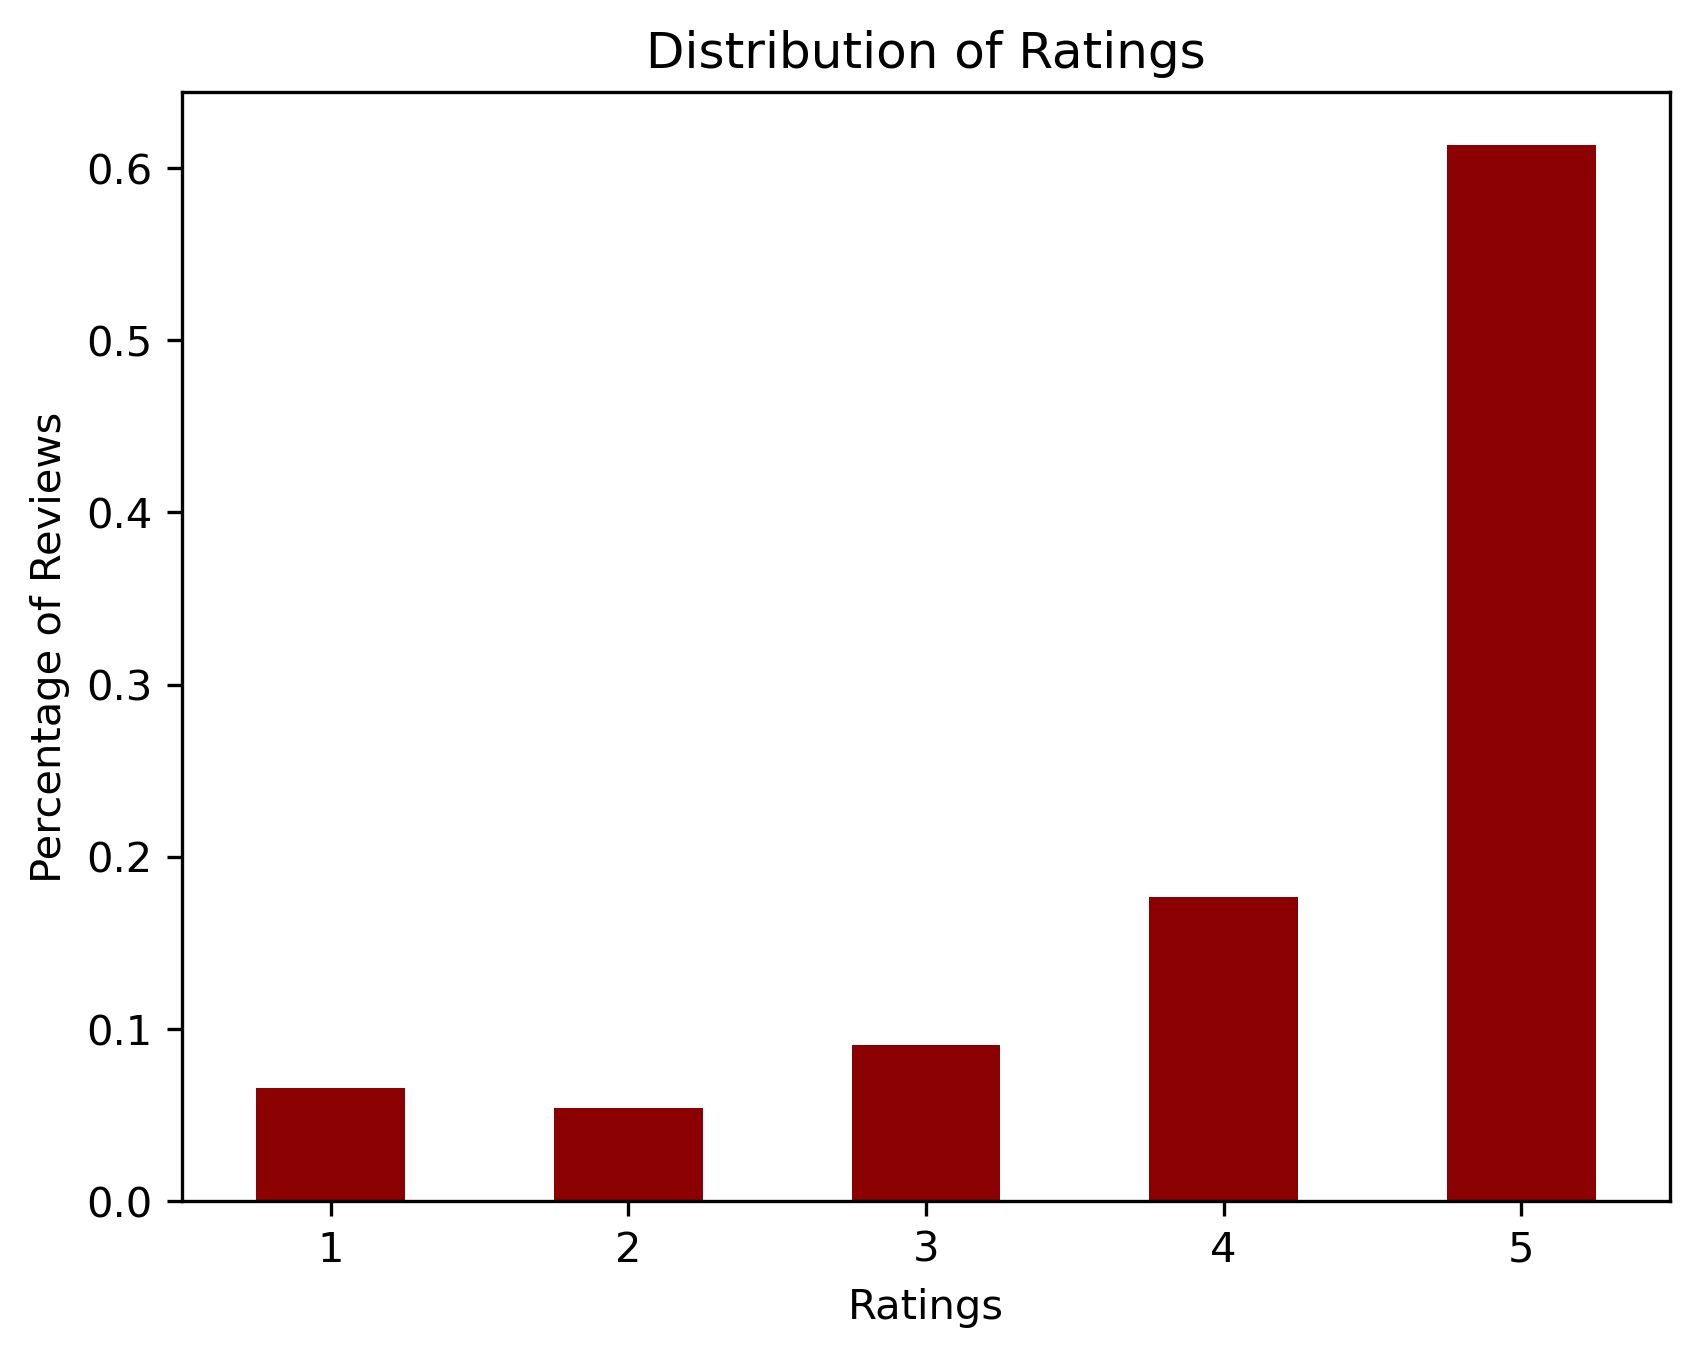

In [40]:
reviews_df['overall'].value_counts(normalize=True).sort_index().plot(kind='bar', rot=0, title='Distribution of Ratings', \
                                                                     color = 'darkred')
plt.xlabel('Ratings')
plt.ylabel('Percentage of Reviews')

plt.savefig('Images/rating_barplot.png')
plt.show()

We could also investigate the average review rating vs. the number of reviews.

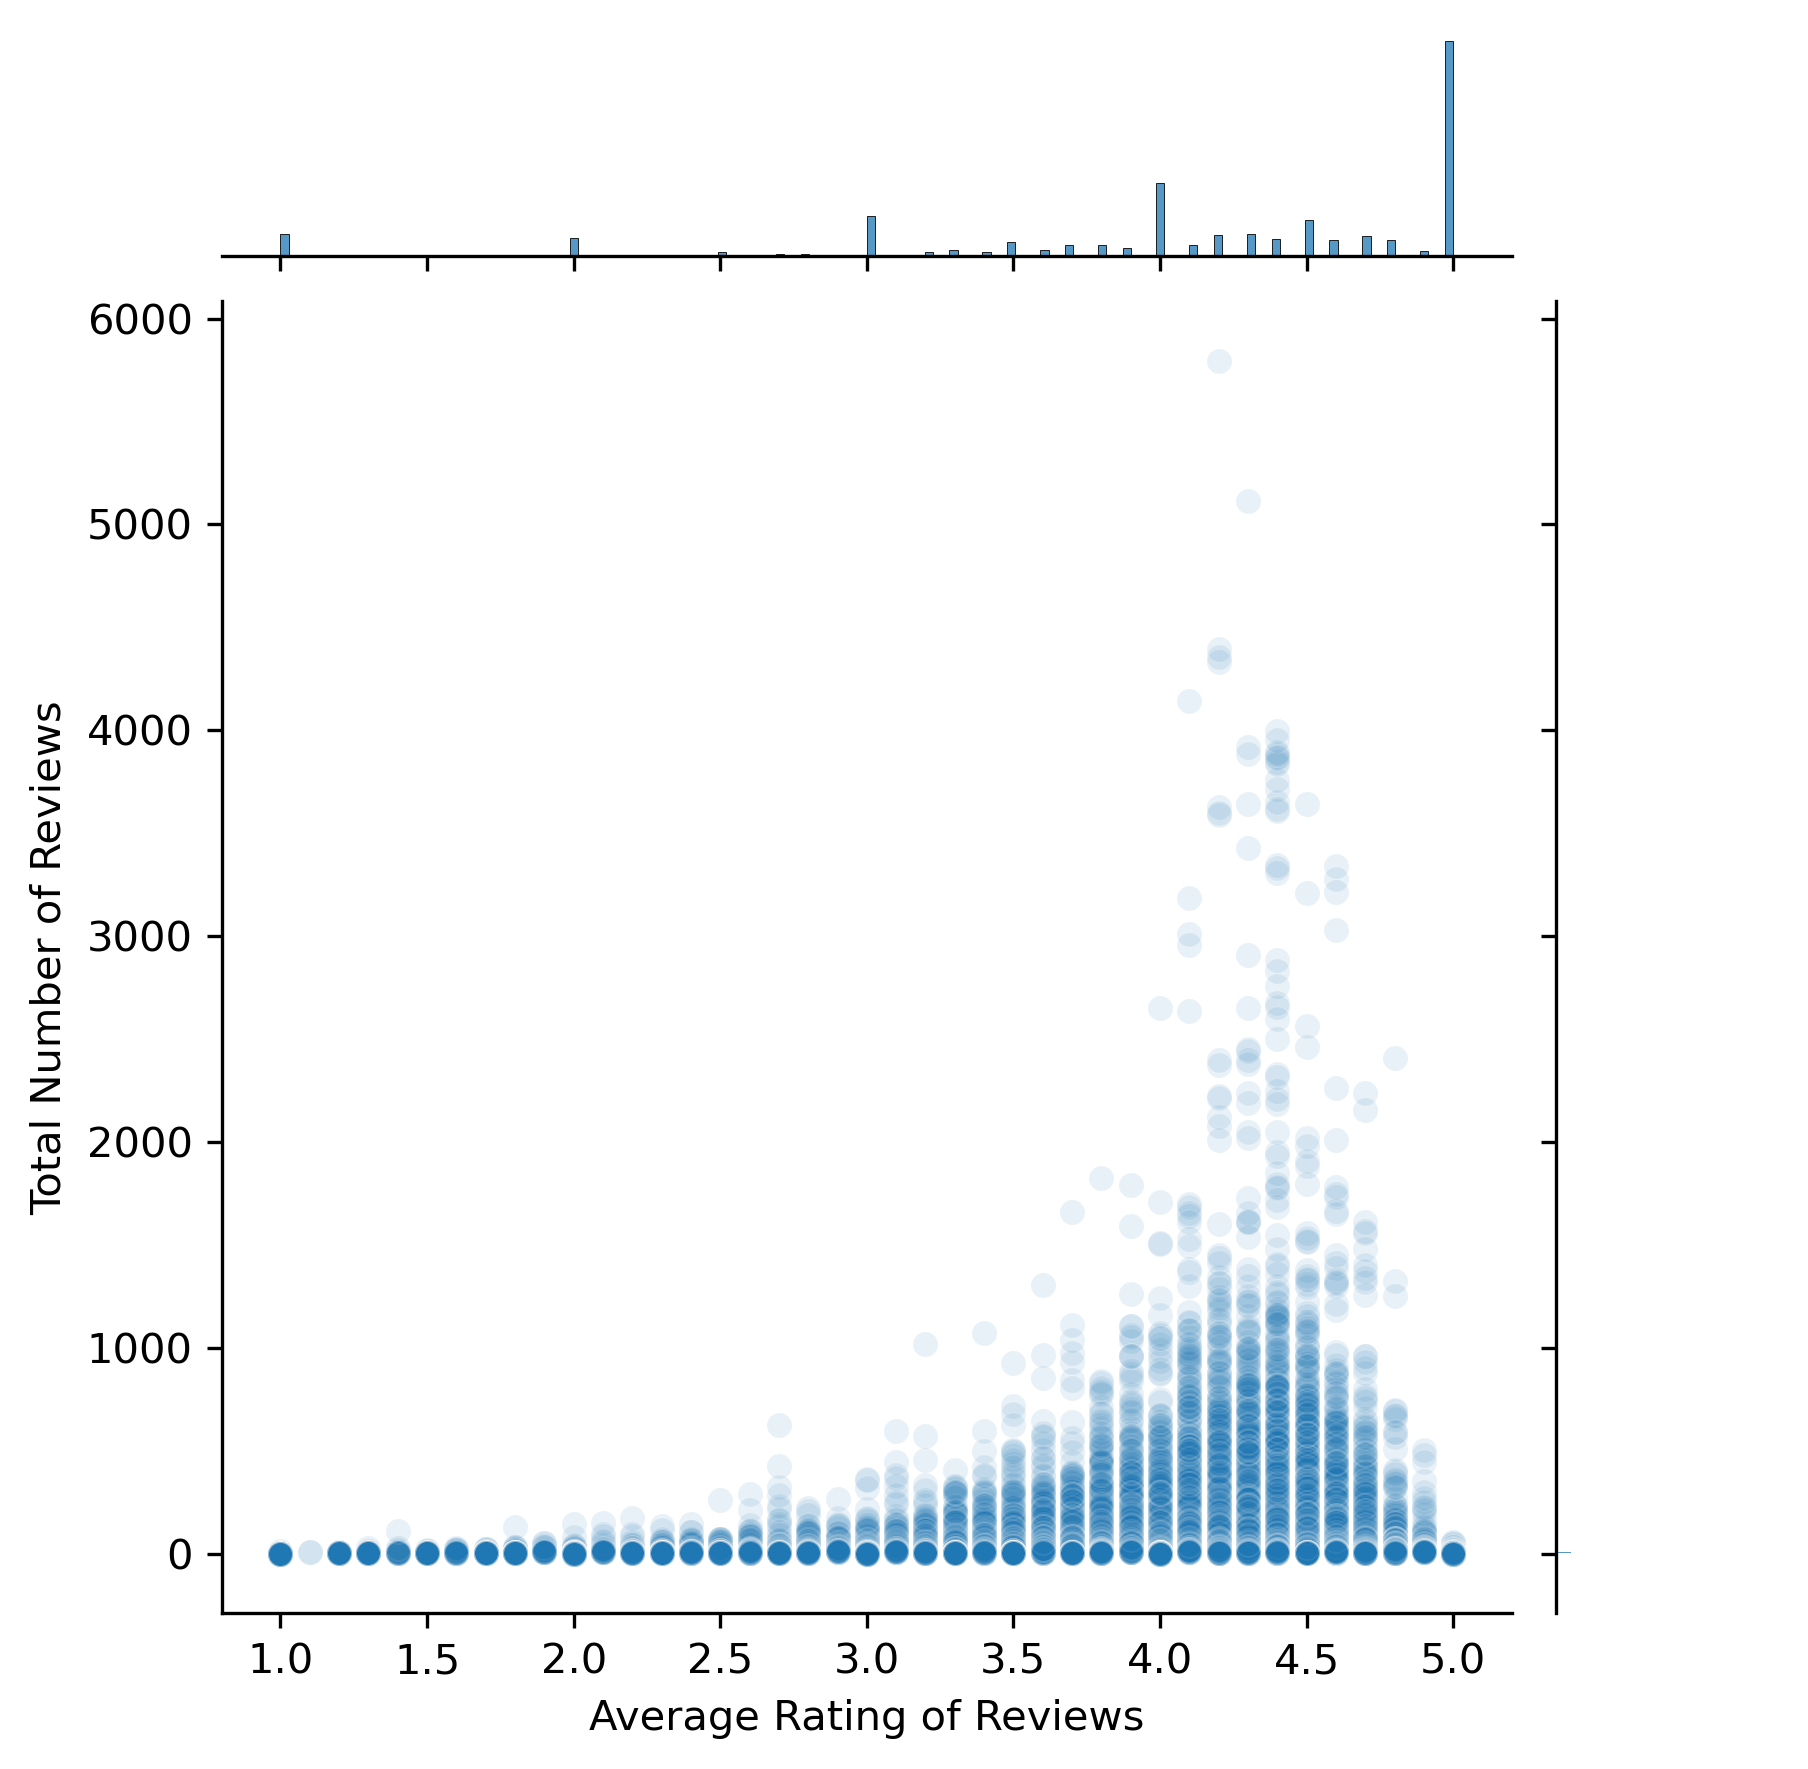

In [41]:
sns.jointplot(data=products_df, x='average_rating', y='total_reviews', alpha=0.1)

plt.ylabel('Total Number of Reviews')
plt.xlabel('Average Rating of Reviews')

plt.savefig('Images/rating_jointplot.png')
plt.show()

### Number of Reviews per Reviewer per Quantile

In [42]:
no_reviews_per_reviewer = reviews_df.groupby(by='reviewerID')['overall'].count().sort_values(ascending=False)
no_reviews_per_reviewer

reviewerID
ALFRMOGTO1K4M     110
A3W5A9X3HHACQT     90
AENH50GW3OKDA      74
A3MPHEJ0N39W87     71
A3J5XBZ9ZNEZOC     70
                 ... 
A2G07JRW1HHU1J      1
A2G07L5Q945C06      1
A2G07OS1TAHKKX      1
A2G07TXROL6NSS      1
AZZZZJYGA32         1
Name: overall, Length: 3943689, dtype: int64

In [43]:
no_reviews_per_reviewer.describe()

count    3.943689e+06
mean     1.487433e+00
std      1.245206e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.100000e+02
Name: overall, dtype: float64

Majority of reviewers leave one review.

In [44]:
quantiles = no_reviews_per_reviewer.quantile(np.arange(0,1.01,0.01))
quantiles

0.00      1.0
0.01      1.0
0.02      1.0
0.03      1.0
0.04      1.0
        ...  
0.96      4.0
0.97      4.0
0.98      5.0
0.99      7.0
1.00    110.0
Name: overall, Length: 101, dtype: float64

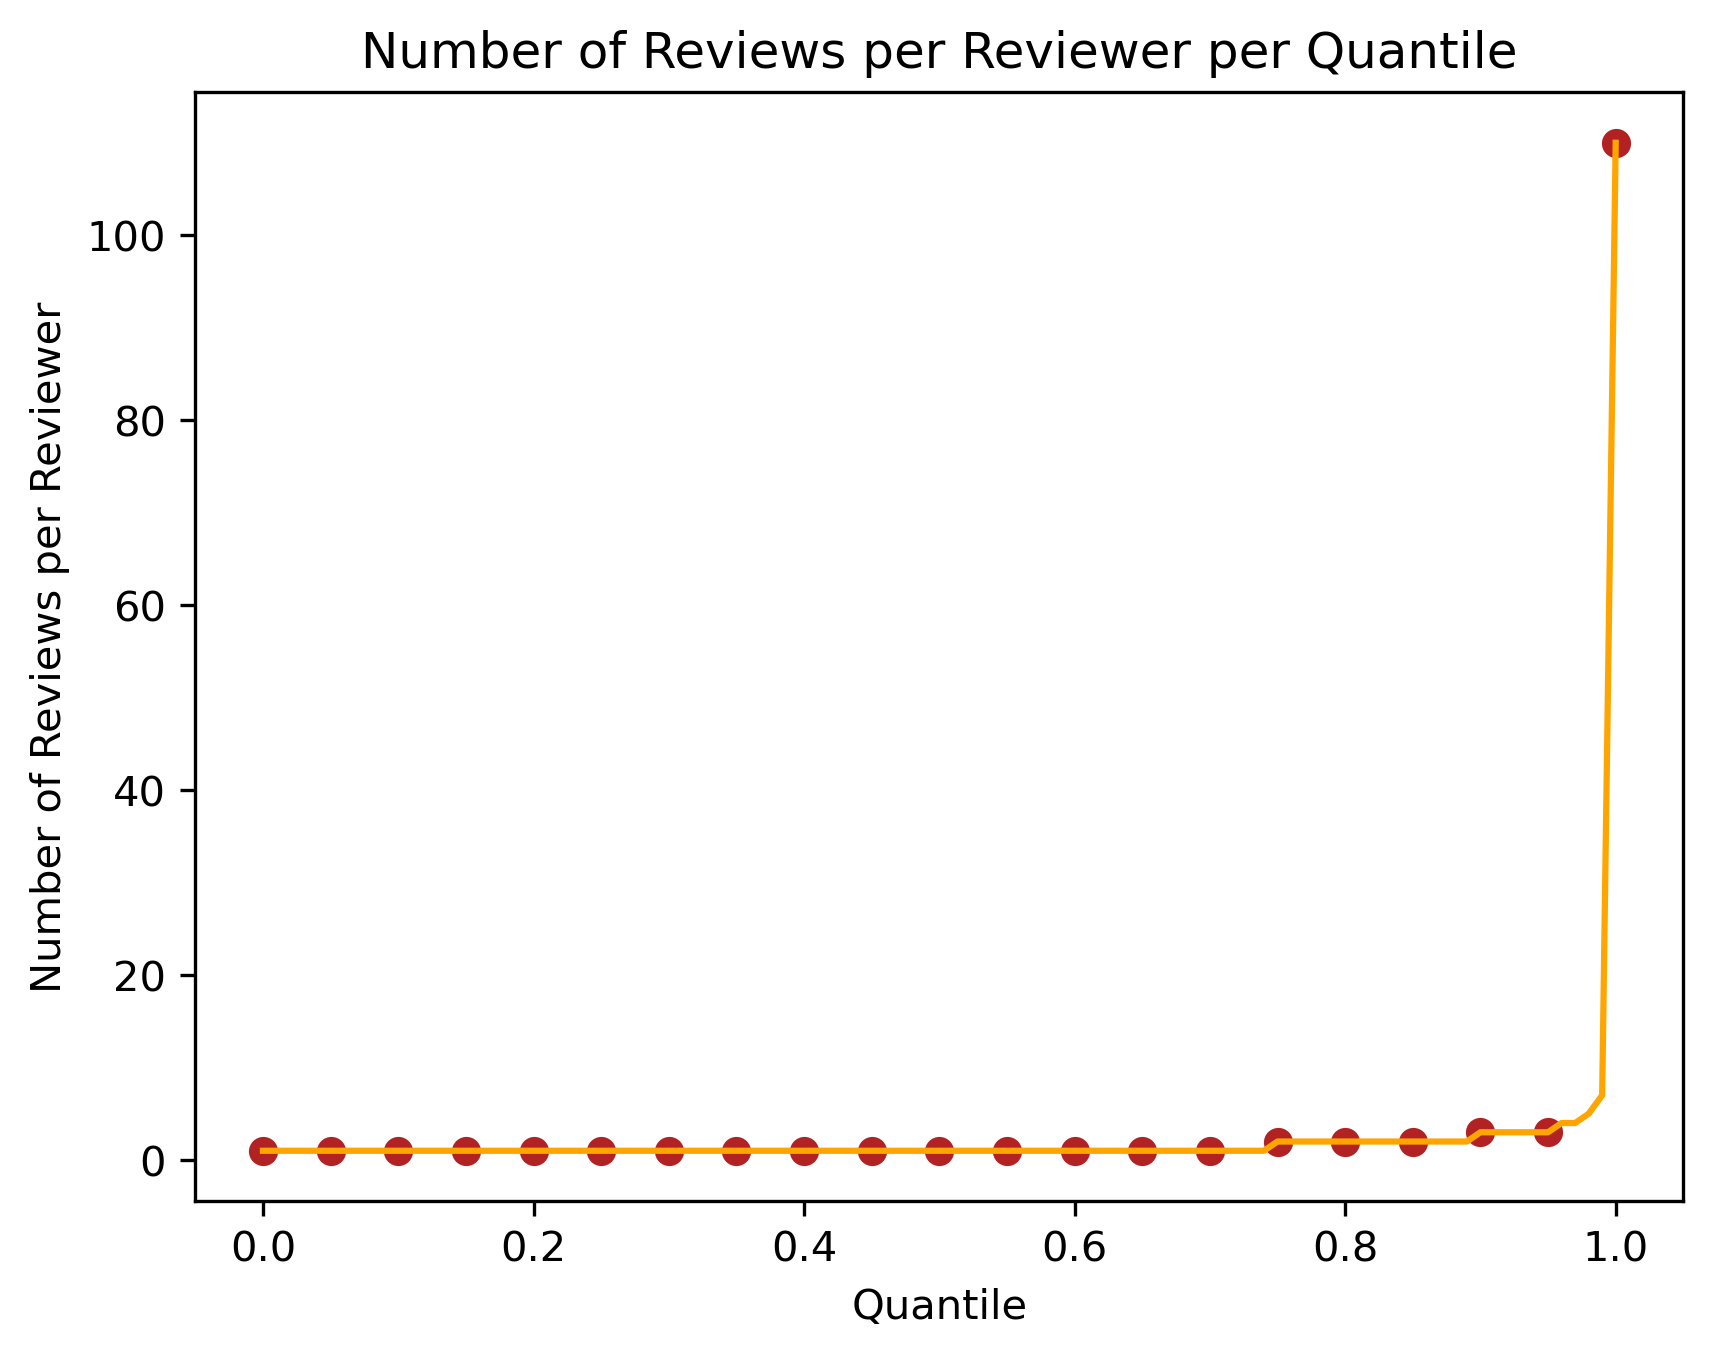

In [45]:
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='firebrick')
plt.plot(quantiles, 'orange')

plt.title('Number of Reviews per Reviewer per Quantile')
plt.xlabel('Quantile')
plt.ylabel('Number of Reviews per Reviewer')

plt.savefig('Images/no_reviews_per_reviewer.png')
plt.show()

### Number of Reviews per Product

In [46]:
no_reviews_per_product = reviews_df.groupby(by='asin')['overall'].count().sort_values(ascending=False)
no_reviews_per_product

asin
B000YXC2LI    5794
B00M4NF9H0    5115
B00F3EDEOC    4397
B00GAPACC0    4357
B000HTICY0    4334
              ... 
B011PM3FX0       1
B00G1XB4PA       1
B011PM47U0       1
B011PM5ATC       1
B00NPADD60       1
Name: overall, Length: 476136, dtype: int64

In [47]:
no_reviews_per_product.describe()

count    476136.000000
mean         12.319953
std          64.531444
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max        5794.000000
Name: overall, dtype: float64

Majority of reviewers leave one review.

In [48]:
quantiles = no_reviews_per_product.quantile(np.arange(0,1.01,0.01))
quantiles

0.00       1.0
0.01       1.0
0.02       1.0
0.03       1.0
0.04       1.0
         ...  
0.96      55.0
0.97      72.0
0.98     102.0
0.99     180.0
1.00    5794.0
Name: overall, Length: 101, dtype: float64

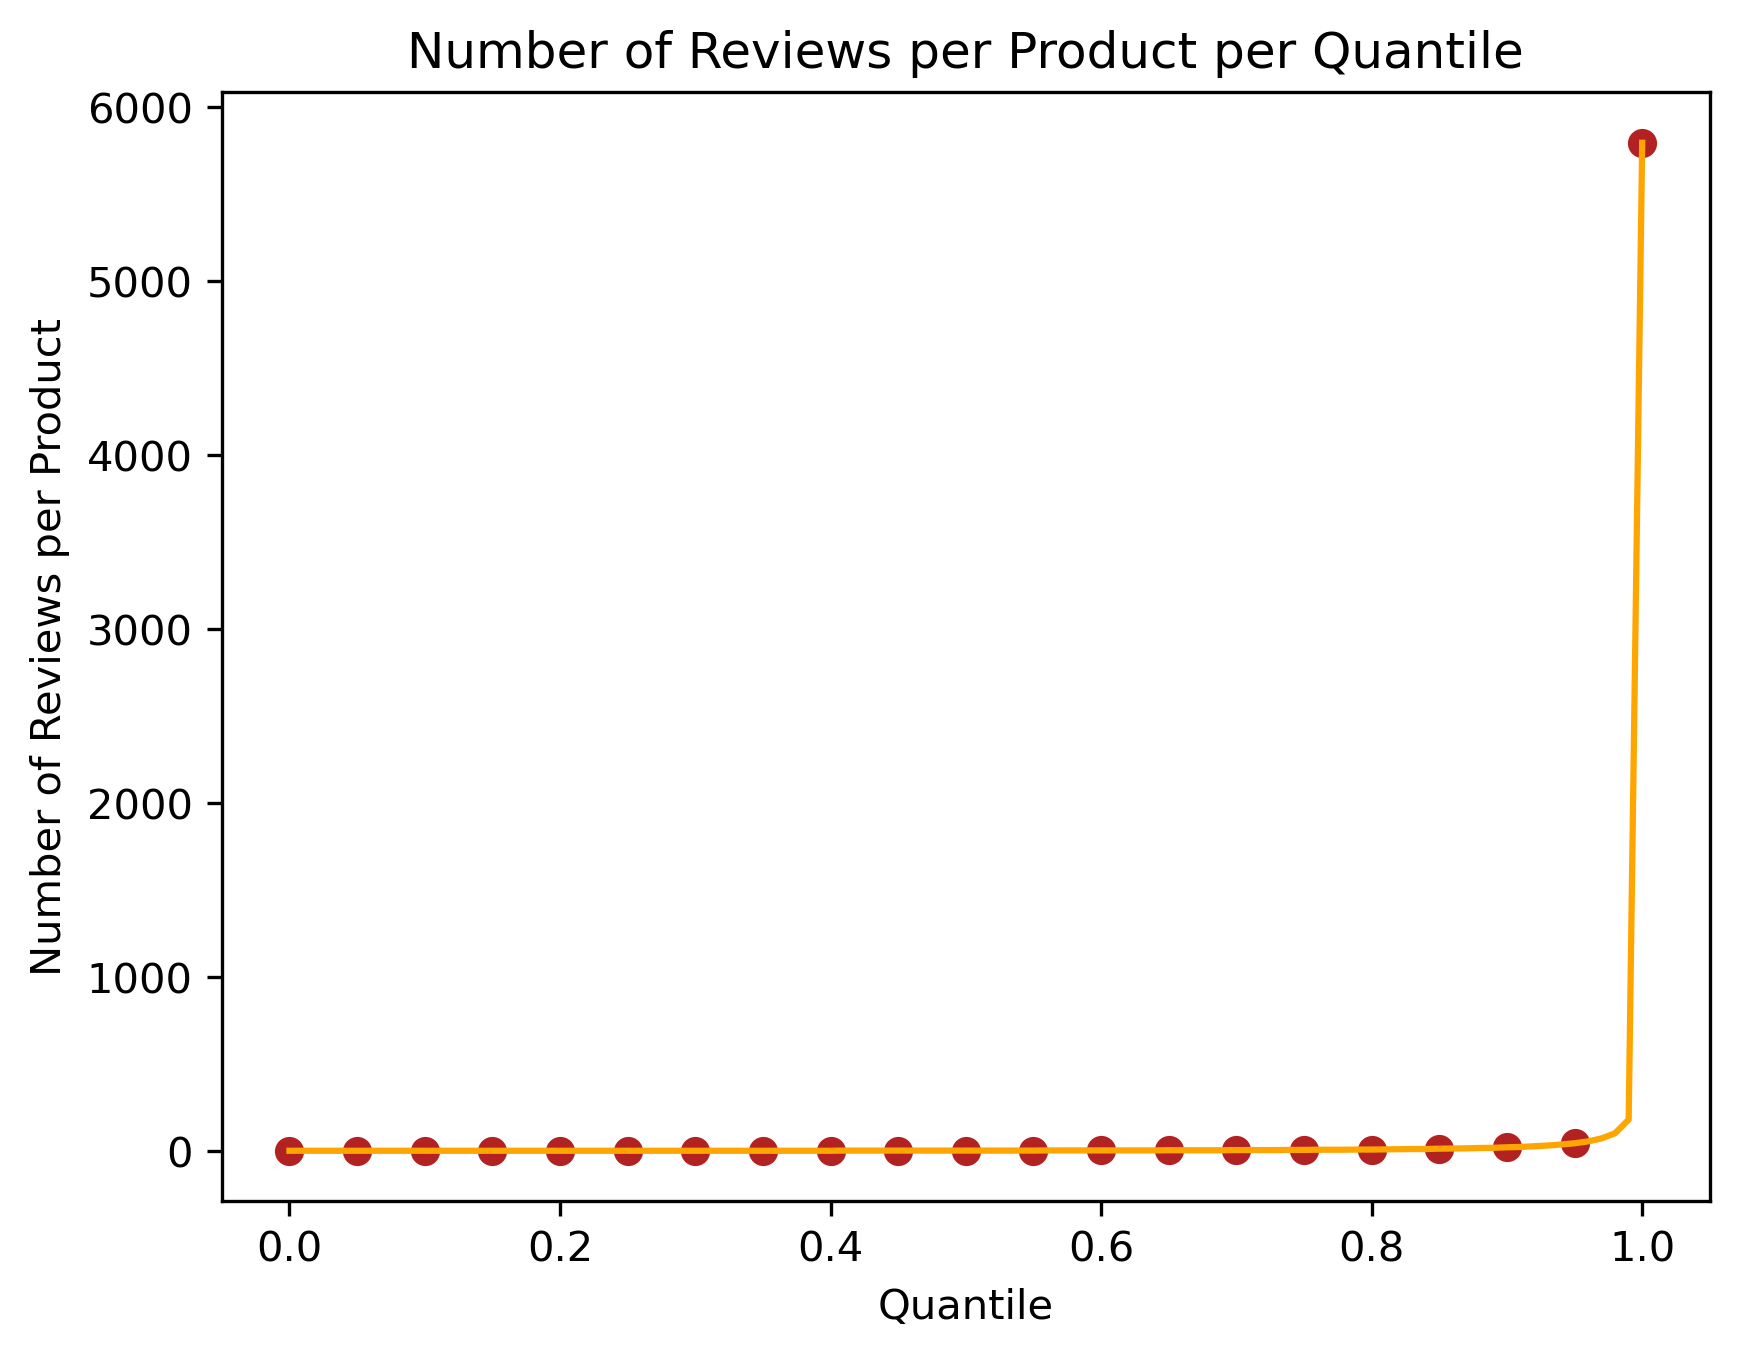

In [49]:
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='firebrick')
plt.plot(quantiles, 'orange')

plt.title('Number of Reviews per Product per Quantile')
plt.xlabel('Quantile')
plt.ylabel('Number of Reviews per Product')

plt.savefig('Images/no_reviews_per_product.png')
plt.show()

## Conclusion <a class="anchor" id="conc"></a>

In this notebook, the reviews data was cleaned and loaded to a dataframe and a summary of the reviews for a product was added to the products dataframe.

*Next notebook*: `popularity_rec.ipynb`